In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
file = './Dataset/combined_value_and_volume.csv'
df = pd.read_csv(file, index_col='Unnamed: 0')
df.head()

,Species,Geolocation,Value,Year,Quarter,Volume
0,Milkfish,National Capital Region (NCR),2.853500e+03,2020,Quarter 1,36.370000
1,Milkfish,Cordillera Administrative Region (CAR),3.503092e+04,2020,Quarter 1,351.713333
2,Milkfish,Region I (Ilocos Region),2.721046e+06,2020,Quarter 1,24495.360000
3,Milkfish,Region II (Cagayan Valley),1.623570e+03,2020,Quarter 1,12.950000
4,Milkfish,Region III (Central Luzon),1.159739e+06,2020,Quarter 1,10972.480000


# Univariate Analysis

As for univariate analysis, we can consider analyzing the content or unique values of each available feature in the dataset.

## Species

In [3]:
print(df['Species'].unique())
print(df['Species'].nunique())

['Milkfish' 'Tilapia' 'Tiger Prawn' 'Mudcrab' 'Endeavor Prawn'
 'White Shrimp' 'Grouper' 'Siganid' 'P. Vannamei' 'Spiny Lobster' 'Carp'
 'Catfish' 'Gourami' 'Mudfish' 'Freshwater Prawn' 'Others' 'Oyster'
 'Mussel' 'Seaweed']
19


Based in this set of species, we can see that we only have 19 unique species available in our dataset. This may not include species that are region specific (such as ...).

## Geolocation

In [4]:
print(df['Geolocation'].unique())
print(df['Geolocation'].nunique())

['National Capital Region (NCR)' 'Cordillera Administrative Region (CAR)'
 'Region I (Ilocos Region)' 'Region II (Cagayan Valley)'
 'Region III (Central Luzon)' 'Region IV-A (CALABARZON)' 'MIMAROPA Region'
 'Region V (Bicol Region)' 'Region VI (Western Visayas)'
 'Region VII (Central Visayas)' 'Region VIII (Eastern Visayas)'
 'Region IX (Zamboanga Peninsula)' 'Region X (Nothern Mindanao)'
 'Region XI (Davao Region)' 'Region XII (SOCCSKSARGEN)'
 'Region XIII (Caraga)'
 'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)']
17


As for geolocation, our group included all 17 regions in the Philippines.

As for `Year` and `Quarter`, there won't be any "checks" that would be done since we're dealing with a dataset that contains the data from Jan 2020 - Dec 2024 per quarter.

## Volume

Since `Volume` is a quantitative variable, we can check its statistics.

In [6]:
df['Volume'].describe()

count      6460.000000
mean       3773.630945
std       18949.624362
min           0.000000
25%           1.250000
50%          17.036667
75%         276.959167
max      328205.210000
Name: Volume, dtype: float64

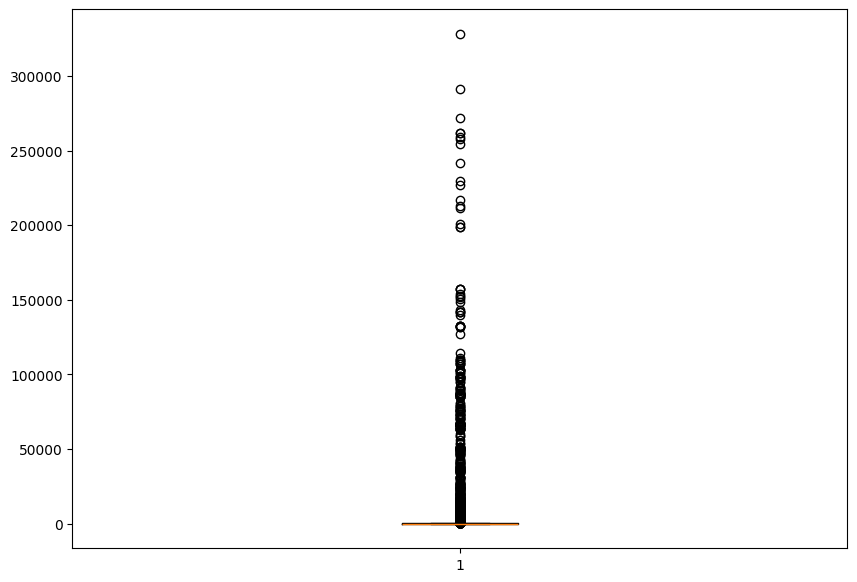

In [7]:
fig = plt.figure(figsize=(10, 7))

plt.boxplot(df['Volume'])
plt.show()

This may not seem like a "very intuitive" box plot but it provides us a view that there's quite a substantial amount of `Volume` data that is "extraneous". It is quite interesting to identify which species contribute to this occurrence or if a certain timeframe lead us to this data.

# Value

We could also utilize the same set of steps done on `Volume` for the `Value` data since they are both quantitative features.

In [8]:
df['Value'].describe()

count    6.460000e+03
mean     1.290199e+05
std      5.149820e+05
min      2.000000e-02
25%      2.144725e+02
50%      2.721182e+03
75%      3.680320e+04
max      9.455618e+06
Name: Value, dtype: float64

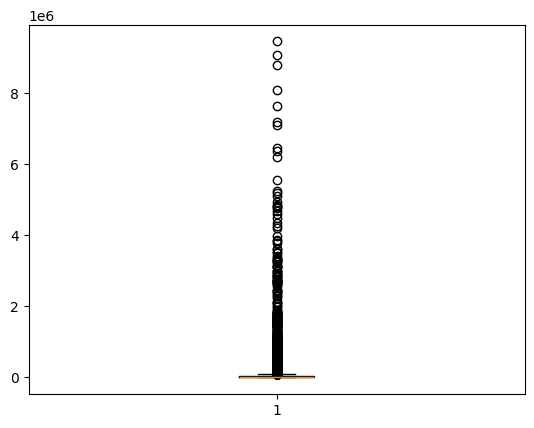

In [9]:
plt.boxplot(df['Value'])
plt.show()

The same set of descriptions could be used to describe the boxplot of the `Value` data. From here, we proceed to check pairings of features for our bivariate analysis. Note that even though we are dealing with time series data, we could instead join `Year` and `Quarter` as one without merging the two columns.

# Bivariate Analysis

As for bivariate analysis, we will be doing a series of plots for pairs that would make sense when paired up.

## Species - Value

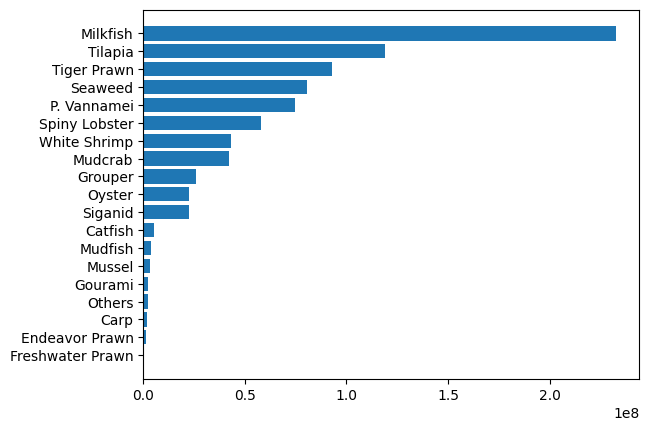

In [ ]:
filtered_df = df.groupby(['Species'])['Value'].sum().reset_index().copy()

filtered_df.sort_values(by='Value', ascending=True, inplace=True)

plt.barh(y=filtered_df['Species'], width=filtered_df['Value'], )
plt.show()

We can see that the Milkfish specie contributes to the highest value compared to the remainder. We can infer from here that the Milkfish specie contributes to the extraneous values from our `Value` data earlier. Note that we used `sum` for our grouping in this plot. Let's check if `mean` would have a different plot.

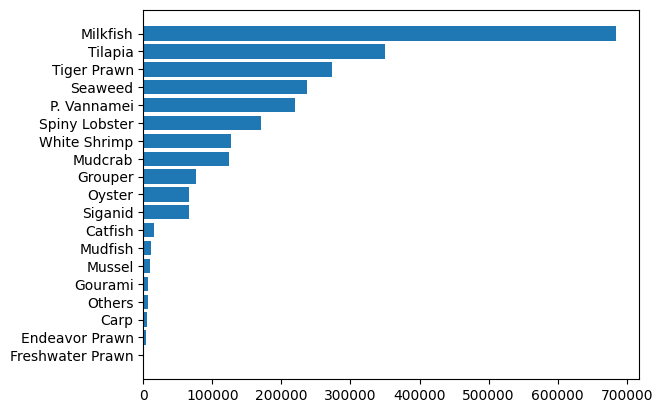

In [10]:
filtered_df = df.groupby(['Species'])['Value'].mean().reset_index().copy()

filtered_df.sort_values(by='Value', ascending=True, inplace=True)

plt.barh(y=filtered_df['Species'], width=filtered_df['Value'], )
plt.show()

As we could, the only change is the shrinking of the x-axis values since each specie has the same number of samples.

## Species - Volume

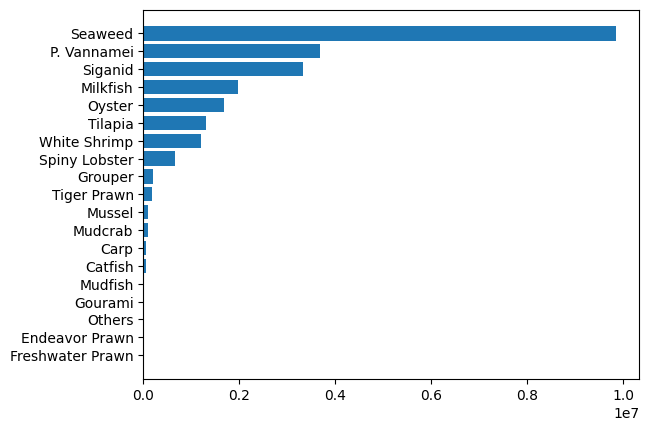

In [11]:
filtered_df = df.groupby(['Species'])['Volume'].sum().reset_index().copy()

filtered_df.sort_values(by='Volume', ascending=True, inplace=True)

plt.barh(y=filtered_df['Species'], width=filtered_df['Volume'], )
plt.show()

## Geolocation - Value

In [30]:
filtered_df = df.groupby(['Geolocation'])['Value'].sum().reset_index().copy()

filtered_df.sort_values(by='Value', ascending=True, inplace=True)

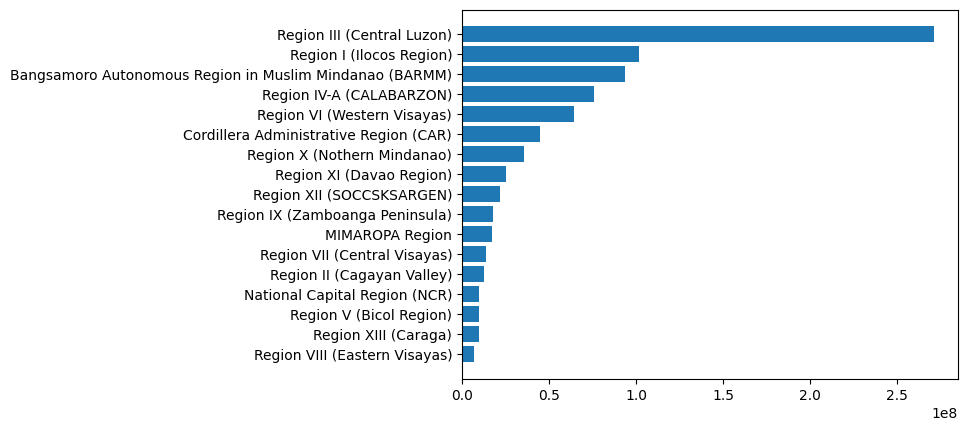

In [31]:
plt.barh(y=filtered_df['Geolocation'], width=filtered_df['Value'], )
plt.show()

This plot is interesting enough since the value prospers in Central Luzon.

## Geolocation - Volume

In [32]:
filtered_df = df.groupby(['Geolocation'])['Volume'].sum().reset_index().copy()

filtered_df.sort_values(by='Volume', ascending=True, inplace=True)

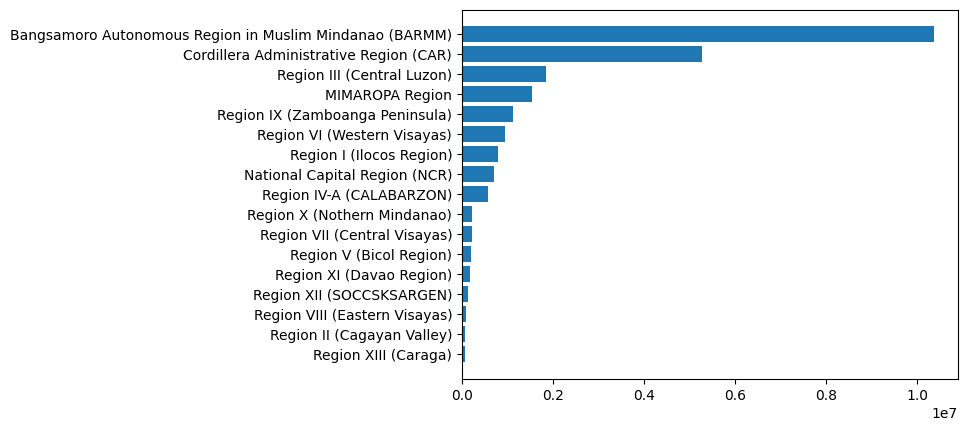

In [33]:
plt.barh(y=filtered_df['Geolocation'], width=filtered_df['Volume'], )
plt.show()

## Value - Year/Quarter

In [37]:
filtered_df = df.groupby(['Year', 'Quarter'])['Value'].sum().reset_index().copy()
filtered_df.sort_values(by=['Year', 'Quarter'], ascending=True, inplace=True)
filtered_df['Year-Quarter'] = filtered_df['Year'].astype(str)+filtered_df['Quarter']

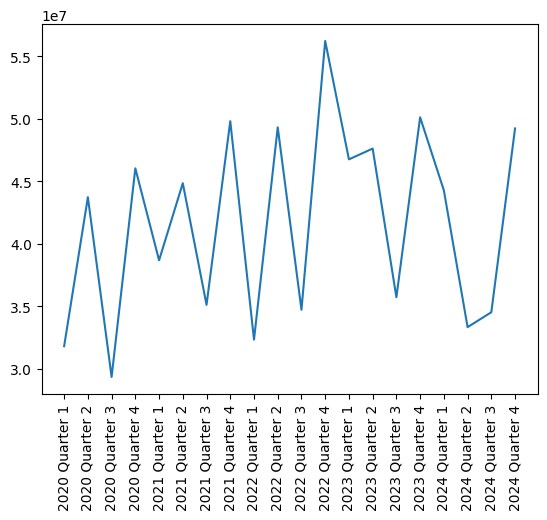

In [41]:
plt.plot(filtered_df['Year-Quarter'], filtered_df['Value'])
plt.xticks(rotation=90)
plt.show()

## Volume - Year/Quarter

In [42]:
filtered_df = df.groupby(['Year', 'Quarter'])['Volume'].sum().reset_index().copy()
filtered_df.sort_values(by=['Year', 'Quarter'], ascending=True, inplace=True)
filtered_df['Year-Quarter'] = filtered_df['Year'].astype(str)+filtered_df['Quarter']

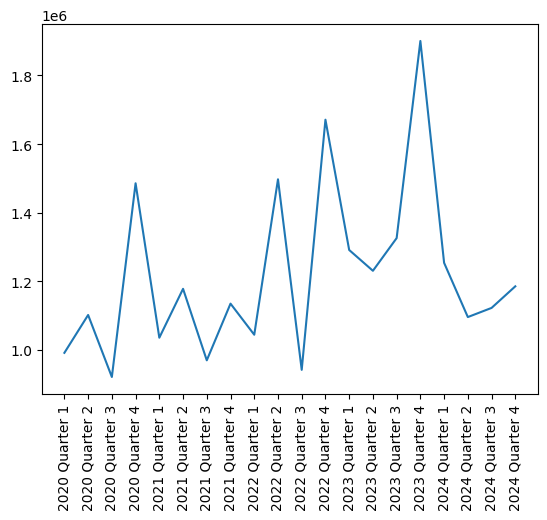

In [43]:
plt.plot(filtered_df['Year-Quarter'], filtered_df['Volume'])
plt.xticks(rotation=90)
plt.show()

## Value - Volume

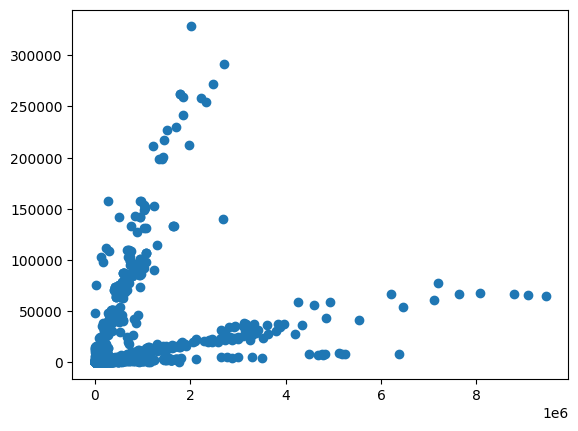

In [44]:
plt.scatter(df['Value'], df['Volume'])
plt.show()

For this plot, there's a discrepancy that could be inferred. Two plots, one going upward and the other slowly curving downward, could be seen.

# Multivariate Analysis

## Value - Year/Quarter per Species

## Value - Year/Quarter per Region

## Volume - Year/Quarter per Species

## Volume - Year/Quarter per Region